In [1]:
# pip install pandas numpy matplotlib scipy yfinance
#!/usr/bin/env python3

In [2]:
import pandas
import yfinance as yf
import matplotlib.pyplot as plt

In [3]:
# Download S&P 500 historical data
sp500 = yf.download("^GSPC", start="2020-01-01", end="2025-01-01",auto_adjust=True, progress=False)

In [4]:
# Inspect the first 5 rows
print(sp500.head())

# Basic info
print(sp500.info())

# describe the data
print(sp500.describe())

Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2020-01-02  3257.850098  3258.139893  3235.530029  3244.669922  3459930000
2020-01-03  3234.850098  3246.149902  3222.340088  3226.360107  3484700000
2020-01-06  3246.280029  3246.840088  3214.639893  3217.550049  3702460000
2020-01-07  3237.179932  3244.909912  3232.429932  3241.860107  3435910000
2020-01-08  3253.050049  3267.070068  3236.669922  3238.590088  3726840000
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2020-01-02 to 2024-12-31
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, ^GSPC)   1258 non-null   float64
 1   (High, ^GSPC)    1258 non-null   float64
 2   (Low, ^GSPC)     1258 non-null   float64
 3   (Open, ^GSPC)    1258 non-null   float64


In [5]:
# calculate daily returns
sp500['DailyReturn'] = sp500['Close'].pct_change()
# Other calculations
sp500['rollingMean'] = sp500['Close'].rolling(window=20).mean()
sp500['rollingStd'] = sp500['Close'].rolling(window=20).std()
sp500['sliceOpen'] = sp500['Open'].rolling(window=3).mean()
sp500['sliceHigh'] = sp500['High'].rolling(window=3).mean()
sp500['sliceLow'] = sp500['Low'].rolling(window=3).mean()
sp500['sliceVolume'] = sp500['Volume'].rolling(window=3).mean()
sp500['sliceDailyReturn'] = sp500['DailyReturn'].rolling(window=3).mean()
sp500['topReturn'] = sp500['DailyReturn'].rolling(window=3).max()
sp500['bottomReturn'] = sp500['DailyReturn'].rolling(window=3).min()

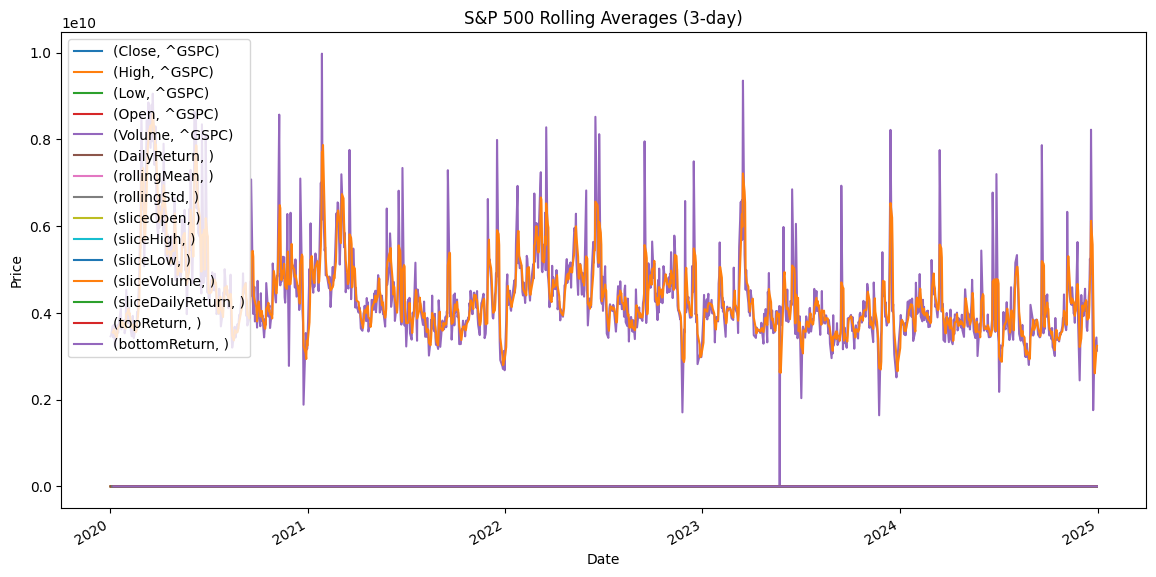

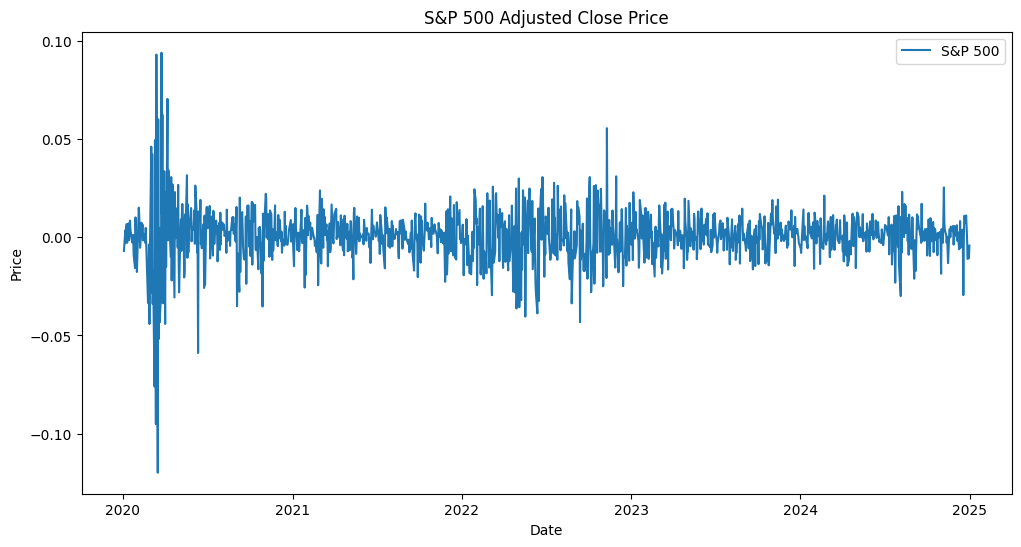

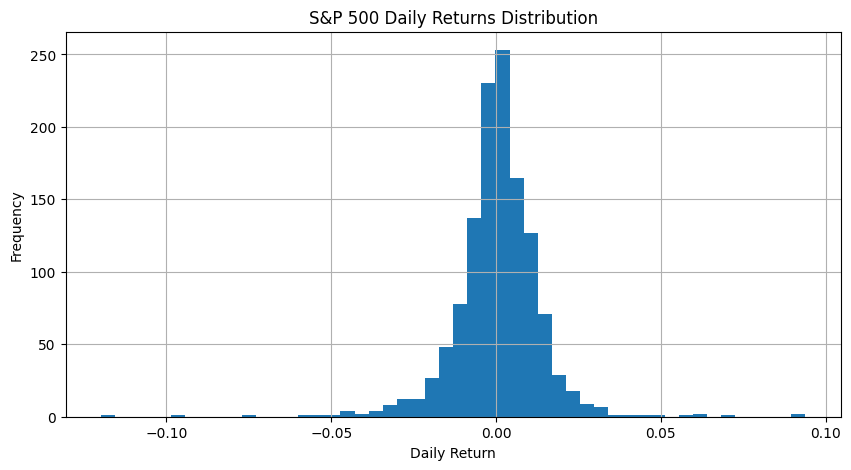

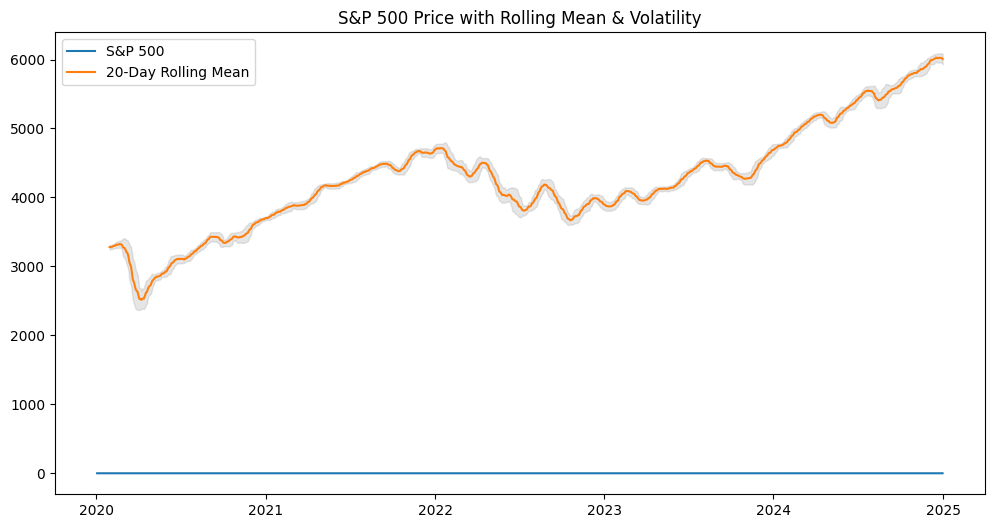

In [7]:
# Plot the rolling averages
sp500.plot(figsize=(14, 7))
plt.title('S&P 500 Rolling Averages (3-day)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()

# Plot Adjusted Close Price
plt.figure(figsize=(12,6))
plt.plot(sp500['DailyReturn'], label='S&P 500')
plt.title('S&P 500 Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot Daily Returns Histogram
plt.figure(figsize=(10,5))
sp500['DailyReturn'].hist(bins=50)
plt.title('S&P 500 Daily Returns Distribution')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

# Plot Rolling Mean and Volatility
plt.figure(figsize=(12,6))
plt.plot(sp500['DailyReturn'], label='S&P 500')
plt.plot(sp500['rollingMean'], label='20-Day Rolling Mean')
plt.fill_between(sp500.index, sp500['rollingMean']-sp500['rollingStd'],
                 sp500['rollingMean']+sp500['rollingStd'], color='gray', alpha=0.2)
plt.title('S&P 500 Price with Rolling Mean & Volatility')
plt.legend()
plt.show()